In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

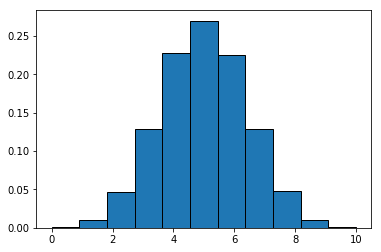

In [2]:
a = np.array([[44.55, 6.6, 39.6], [6.24, 68.64, 0.00], [0, 53.46, 46.98], [21, 0, 25.5]])
norms =[np.linalg.norm(a[:,i]) for i in range(3)]
bla = np.array([27, 3, 0, 4]) * ((1 / norms[0]) * a[:, 0])
unit_vectors = np.array([(1 / norms[i]) * a[:, i] for i in range(3)]).T

V = np.array([0, 1.3, 2, 3])
norm_V = np.linalg.norm(V)
v = (1 / norm_V) * V

w = np.array([1, 0, 1, 2])
unit_w = (1 / np.linalg.norm(w)) * w

idf = np.array([1.65, 2.08, 1.62, 1.5])
one = np.array([1, 0, 1, 0])
two = np.array([0.48, 0, 0.47, 0])

score = np.dot(unit_vectors[:,0], one)

b = np.array([[3.06, 2, 1.3, 0], [2.76, 1.85, 0, 0], [2.3, 2.04, 1.78, 2.58]]).T
norms =[np.linalg.norm(b[:,i]) for i in range(3)]

# Homework Thermodynamics
from math import factorial
def nchoosek(n,k):
    return factorial(n) / (factorial(k) * factorial(n - k))

answers = [nchoosek(20, k) for k in range(21)]

with open('thermo_q1.txt', 'w') as f:
    for item in answers:
        f.write("%s\n" % item)
omega_all = sum(answers)

def experiment(M, n):
        return np.random.binomial(n, 0.5, M)
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(experiment(200000, 10), bins = 11, range = (0, 10), density = True)

def Stirl(a):
    return math.sqrt(2 * 3.14 * float(a)) * float(a**a) * math.exp(-a)

def Omega(n, k): 
    return Stirl(n) / Stirl(k) / Stirl(n - k) 

In [3]:
# Zoekmachines week 5
a = 'ArieLL'
a.lower()
b = 'Ari'
b in a


True

In [4]:
for i in range (10, 20):
    print(i)
    
npmean(10, 20)

10
11
12
13
14
15
16
17
18
19


NameError: name 'npmean' is not defined

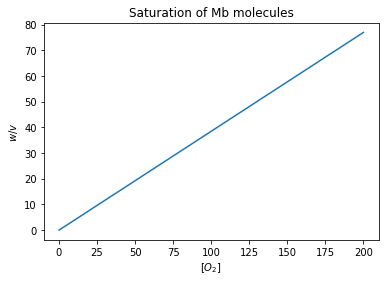

In [3]:
sig = 1.8 * (10 ** -9)
K = 2.6 * sig
PO2 = np.linspace(200,.05,1000)
func = PO2 * sig / K

plt.plot(PO2, func)
#plt.title('Oxygen Concentration Profile')
plt.title("Saturation of Mb molecules")
plt.ylabel('$ w/v $ ')
plt.xlabel('[$O_2$]')
plt.show()

In [35]:
# TRANSPORT ASSIGNMENT 2, 8/11/18'

# set parameteres
Dw = 3.6*10**(-7)
Du = 1.4*10**(-5)
sig = 1.8*10**(-9)
P_0 = 200
P_L = .05
b = 0.9375*(10**-5)
k_min = 40
k_plus = 3*(10**9)
u_0 = sig * P_0
L = 5000 * (10 ** -3)
N = 256

alpha = k_min * L**2 / Dw
beta = Dw * b / Du / u_0
gamma = k_plus * u_0 / k_min

u, w = [None] * (N + 1), [None] * (N + 1)
u[0], u[1] = 1, P_L / P_0
#u.append(1)
#u.append(P_L / P_0)


def U():
    for i in range(1, N + 1):
        u[i] = (u[i + 1] + u[i -1] + alpha*beta*deltaX2* w[i]) / (alpha*beta*gamma*(1 - w[i]) * deltaX2 + 2)
    return u

#w[0] = (2 * w[1] + alpha * gamma * deltaX2 * u[0]) / (alpha * (1 + gamma * u[0]) * deltaX2 + 2)

def W():
    for i in range(1, N + 1):
        w[i] = (w[i + 1] + w[i -1] + alpha * gamma * deltaX2 * u[i]) / (alpha * (1 + gamma * u[i]) * deltaX2 + 2)
    return w  
#w[N] = (2 * w[N - 1] + alpha * gamma * deltaX2 * u[N]) / (alpha * (1 + gamma * u[N]) * deltaX2 + 2)
        

In [36]:
def code3():
    for i in range(1, N + 1):
        u[i] = ((u[0] - u[N]) * i * (1/N)) + u[0]
        w[i] = k_plus * b * u[i] / (k_plus * u[i] + k_min)

In [37]:
# my piece of code
X = [i / N for i in range(0, N + 1)]
deltaX2 = (1 / N) ** 2 
w[0] = gamma * deltaX2 / (alpha * (1 + gamma) * deltaX2)
w[1] = gamma * P_L / P_0 / ((1 + gamma*P_L/P_0) * deltaX2)

def rates():
    
    for i in range(1, N):
        #u[i + 1] = w[X[i]]*(alpha*(1 + gamma*u[X[i]])*deltaX2 + 2) - w[X[i - 1]] - alpha*gamma*u[X[i]]*deltaX2
        print('u[{}] is {}'.format(i + 1, u[i + 1]))
        u[i + 1] = w[i]*(alpha*(1 + gamma*u[i])*deltaX2 + 2) - w[i - 1] - alpha*gamma*u[i]*deltaX2
        #u.append(w[i]*(alpha*(1 + gamma*u[i])*deltaX2 + 2) - w[i - 1] - alpha*gamma*u[i]*deltaX2)
        #w[i + 1] = u[X[i]]*(alpha*beta*gamma*(1 - w[X[i]])*deltaX2 + 2) - u[X[i - 1]] - alpha*beta*w[X[i]]*deltaX2
        print('w[{}] is {}'.format(i + 1, w[i + 1]))
        w[i + 1] = u[i]*(alpha*beta*gamma*(1 - w[i])*deltaX2 + 2) - u[i - 1] - alpha*beta*w[i]*deltaX2
        #w.append(u[i]*(alpha*beta*gamma*(1 - w[i])*deltaX2 + 2) - u[i - 1] - alpha*beta*w[i]*deltaX2)
    return u, w

In [41]:
# TRANSPORT ASSIGNMENT 2, 8/11/18'

# set parameteres
Dw = 3.6*10**(-7)
Du = 1.4*10**(-5)
sig = 1.8*10**(-9)
P_0 = 200
P_L = .05
b = 0.9375*(10**-5)
k_min = 40
k_plus = 3*(10**9)
u_0 = sig * P_0
L = 5000 * (10 ** -3) # or 500 in the other case
N = 256

alpha = k_min * L**2 / Dw
beta = Dw * b / Du / u_0
gamma = k_plus * u_0 / k_min

u, w = [None] * (N + 1), [None] * (N + 1)
u[0], u[1] = 1, P_L / P_0

# my piece of code
X = [i / N for i in range(0, N + 1)]
deltaX2 = (1 / N) ** 2 
w[0] = gamma * deltaX2 / (alpha * (1 + gamma) * deltaX2)
w[1] = gamma * P_L / P_0 / ((1 + gamma*P_L/P_0) * deltaX2)

def rates():   
    for i in range(1, N):
        u[i + 1] = w[i]*(alpha*(1 + gamma*u[i])*deltaX2 + 2) - w[i - 1] - alpha*gamma*u[i]*deltaX2
        print('u[{}] is {}'.format(i + 1, u[i + 1]))
        w[i + 1] = u[i]*(alpha*beta*gamma*(1 - w[i])*deltaX2 + 2) - u[i - 1] - alpha*beta*w[i]*deltaX2
        print('w[{}] is {}'.format(i + 1, w[i + 1]))
    return u, w
answers = rates()

u[2] is 18750592.701777596
w[2] is -12555612.98457037
u[3] is -2.6942276505714406e+20
w[3] is 1.8041703017221538e+20
u[4] is -5.562796226394249e+46
w[4] is 3.725086758746149e+46
u[5] is -2.371433093781769e+99
w[5] is 1.588013232443149e+99
u[6] is -4.3096929162357847e+204
w[6] is 2.8859550778364636e+204
u[7] is -inf
w[7] is inf
u[8] is nan
w[8] is nan
u[9] is nan
w[9] is nan
u[10] is nan
w[10] is nan
u[11] is nan
w[11] is nan
u[12] is nan
w[12] is nan
u[13] is nan
w[13] is nan
u[14] is nan
w[14] is nan
u[15] is nan
w[15] is nan
u[16] is nan
w[16] is nan
u[17] is nan
w[17] is nan
u[18] is nan
w[18] is nan
u[19] is nan
w[19] is nan
u[20] is nan
w[20] is nan
u[21] is nan
w[21] is nan
u[22] is nan
w[22] is nan
u[23] is nan
w[23] is nan
u[24] is nan
w[24] is nan
u[25] is nan
w[25] is nan
u[26] is nan
w[26] is nan
u[27] is nan
w[27] is nan
u[28] is nan
w[28] is nan
u[29] is nan
w[29] is nan
u[30] is nan
w[30] is nan
u[31] is nan
w[31] is nan
u[32] is nan
w[32] is nan
u[33] is nan
w[33] is nan

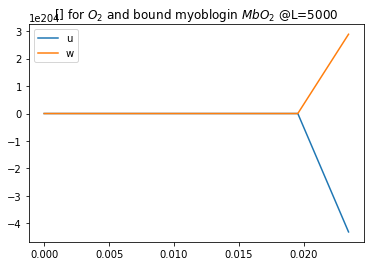

In [50]:
plt.plot(X, u)
plt.plot(X, w)
plt.title('[] for $O_2$ and bound myoblogin $MbO_2$ @L=5000')
plt.legend(('u', 'w'))
plt.show()

In [8]:
a = np.array([3, 5, 14])
b = np.array([6, 6, 5])
c = a @ b # dot product
d = a * b # element wise
sum(d)

118

In [1]:
# HOW dictionaries work
mydic = {}
mydic["key1"] = [3,5,6]
print(mydic)

{'key1': [3, 5, 6]}
